In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/x1b3d3ad/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


   DOMESTIC  INTERNATIONAL     TOTAL       date
0  48054917        9578435  57633352 2002-10-01
1  44850246        9016535  53866781 2002-11-01
2  49684353       10038794  59723147 2002-12-01
3  43032450        9726436  52758886 2003-01-01
4  41166780        8283372  49450152 2003-02-01


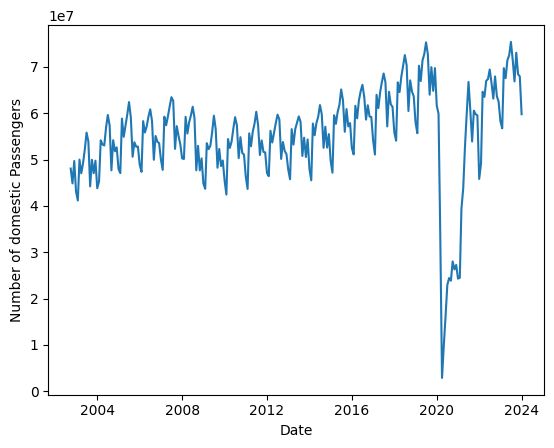

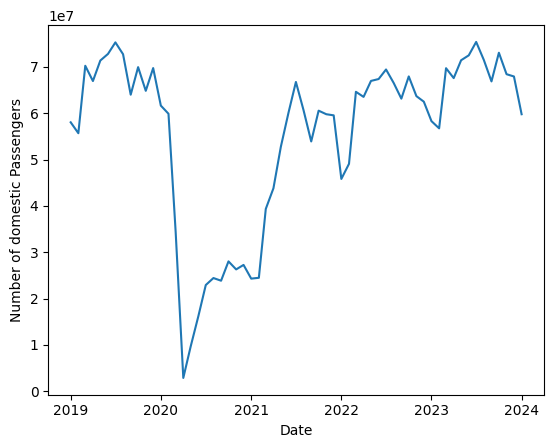

In [15]:
df = pd.read_csv('data/raw/passengersVsTime.csv')

# Make a new column that combines year and month
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.drop(columns=['Year', 'Month'], inplace=True)
print(df.head())

# create a line plot of the number of passengers over time
sns.lineplot(x='date', y='DOMESTIC', data=df)
plt.xlabel('Date')
plt.ylabel('Number of domestic Passengers')
plt.show()

# get dates from the year 2022 to present 
df['date'] = df['date'].dt.strftime('%Y-%m')
df = df[df['date'] >= '2019-01']
df['date'] = pd.to_datetime(df['date'])
sns.lineplot(x='date', y='DOMESTIC', data=df)
plt.xlabel('Date')
plt.ylabel('Number of domestic Passengers')
plt.show()



        Month      DOMESTIC
0        July  6.215881e+07
1      August  5.987053e+07
2        June  5.939650e+07
3       March  5.733055e+07
4     October  5.689828e+07
5         May  5.687904e+07
6    December  5.474418e+07
7    November  5.389259e+07
8       April  5.384592e+07
9   September  5.235006e+07
10    January  4.924835e+07
11   February  4.740480e+07


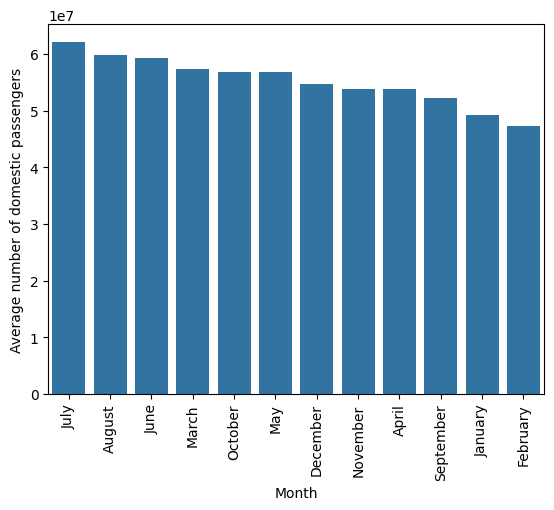

In [42]:
""" Now, I want to find the busiest time of year for each year """
df = pd.read_csv('data/raw/passengersVsTime.csv')

# group by month and get the mean number of passengers for all months
monthly_mean = df.groupby('Month')[['DOMESTIC']].mean()
monthly_mean = monthly_mean.sort_values('DOMESTIC', ascending=False)
monthly_mean = monthly_mean.reset_index()
monthly_mean['Month'] = pd.Categorical(monthly_mean['Month'], categories=monthly_mean['Month'], ordered=True)

# rename months to their names
monthly_mean['Month'] = monthly_mean['Month'].map({1: 'January', 2: 'February',
     3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
     9: 'September', 10: 'October', 11: 'November', 12: 'December'})
print(monthly_mean)

# Plot the busiest month for each year
sns.barplot(x='Month', y='DOMESTIC', data=monthly_mean)
plt.xlabel('Month')
plt.ylabel('Average number of domestic passengers')
plt.xticks(rotation=90)
plt.show()
